### Импортируем необходимые для работы библиотеки

In [15]:
import pandas as pd
import pycountry_convert as pc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Загрузим наш датафрейм из файла .csv

In [3]:
df=pd.read_csv('Cost_of_Living_Index_2022.csv', header=1)

In [4]:
df

,Rank,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,1,Afghanistan,20.37,2.72,12.09,14.92,12.41,23.04
1,2,Albania,35.50,8.47,22.83,29.32,25.82,30.19
2,3,Algeria,26.87,4.59,16.43,28.82,14.48,24.63
3,4,Argentina,34.69,7.71,22.04,28.17,33.32,30.72
4,5,Armenia,33.89,11.61,23.45,27.59,30.55,28.86
...,...,...,...,...,...,...,...,...
134,135,Venezuela,43.20,9.99,27.63,37.34,46.23,15.41
135,136,Vietnam,37.48,13.22,26.11,38.70,19.98,29.38
136,137,Yemen,53.14,6.71,31.38,67.12,24.74,14.41
137,138,Zambia,33.04,9.26,21.90,31.53,22.46,40.33


### Ознакомимся с представленными данными

In [6]:
df.describe()

,Rank,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
count,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000
mean,70.000000,50.188633,19.291511,35.705324,46.637842,43.444892,46.426259
std,40.269923,20.860222,15.317726,17.542523,20.952229,24.885969,26.921840
min,1.000000,19.920000,2.720000,12.090000,14.920000,12.410000,1.450000
25%,35.500000,34.715000,9.515000,23.310000,31.200000,25.290000,27.040000
50%,70.000000,44.680000,13.930000,31.260000,40.220000,34.560000,37.220000
75%,104.500000,62.580000,25.070000,44.865000,56.590000,54.925000,66.105000
max,139.000000,146.040000,98.580000,123.800000,148.660000,159.170000,118.440000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Rank                            139 non-null    int64  
 1   Country                         139 non-null    object 
 2   Cost of Living Index            139 non-null    float64
 3   Rent Index                      139 non-null    float64
 4   Cost of Living Plus Rent Index  139 non-null    float64
 5   Groceries Index                 139 non-null    float64
 6   Restaurant Price Index          139 non-null    float64
 7   Local Purchasing Power Index    139 non-null    float64
 8   Continent                       139 non-null    object 
dtypes: float64(6), int64(1), object(2)
memory usage: 9.9+ KB


 Всё в порядке, нет пропущенных значений, формат данных однороден. Для 'Cost of Living Index', 'Groceries Index', 'Restaurant Price Index', 'Local Purchasing Power Index'  среднее значение составляет от 43 до 50. Данные сильно разнятся. Например, минимальное значение 'Cost of Living Index' составляет всего 19,92, а максимальное — 146,04. А для 'Local Purchasing Power Index' значения варьируются от 1,45 до 118,44.

### Сопоставление стран и континентов

Для выполнения анализа добавим в наш датасет колонку "Континент". Для этого воспользуемся библиотекой pycountry_convert lib.
Но для корректной работы, выполним предварительные действия:
Переименуем 'Bosnia And Herzegovina' и 'Trinidad And Tobago' в соответствии со списком стран https://en.wikipedia.org/wiki/ISO_3166-1_alpha-2

In [7]:
replace_values = {'Bosnia And Herzegovina': 'Bosnia and Herzegovina',  'Trinidad And Tobago': 'Trinidad and Tobago'}  
df['Country'] = df['Country'].replace(replace_values)

Следует обратить внимание на то, что Косово не входит в вышеуказанный список стран, таким образом мы добавим эту страну на Европейский континент вручную, при написании функции

In [8]:
def country_to_continent(country_name):
    if country_name != 'Kosovo (Disputed Territory)':
        country_alpha2 = pc.country_name_to_country_alpha2(country_name)
        country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
        country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
    else:
        country_continent_name = 'Europe'
    return country_continent_name

df['Continent'] = df['Country'].apply(lambda x: country_to_continent(x))

### Средний индекс стоимости жизни и арендной платы по континентам

Немного обобщим. Рассчитаем средние значения индекса стоимости жизни и индекса арендной платы по континентам и построим диаграмму сравнения

In [12]:
cost_by_continent = df.groupby(['Continent'])["Cost of Living Index"].agg('mean').to_frame(name = 'Mean Cost of Living Index').reset_index()
rent_by_continent = df.groupby(['Continent'])["Rent Index"].agg('mean').to_frame(name = 'Mean Rent Index').reset_index()

In [20]:
cost_and_rent = cost_by_continent
cost_and_rent['Mean Rent Index'] = rent_by_continent['Mean Rent Index']
cost_and_rent=cost_and_rent.round(decimals=0)
cost_and_rent

,Continent,Mean Cost of Living Index,Mean Rent Index
0,Africa,39.0,13.0
1,Asia,46.0,19.0
2,Europe,58.0,23.0
3,North America,60.0,23.0
4,Oceania,65.0,30.0
5,South America,38.0,10.0


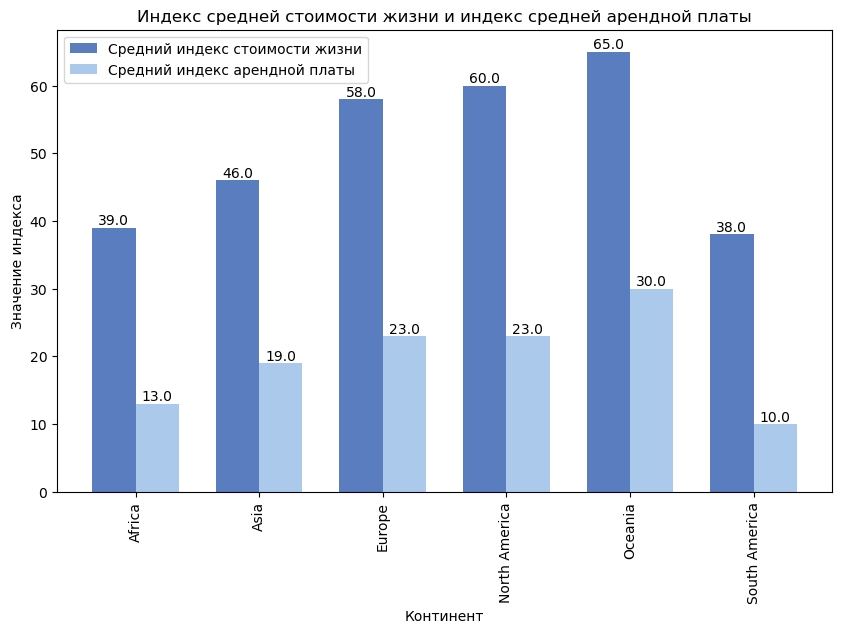

In [35]:
colors = ['#597dbf', '#abc9ea']
bar_width = 0.35
fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(cost_and_rent))
cost_bars = ax.bar(x, cost_and_rent['Mean Cost of Living Index'], width=bar_width, color=colors[0])
rent_bars = ax.bar(x + bar_width, cost_and_rent['Mean Rent Index'], width=bar_width, color=colors[1])
ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(cost_and_rent['Continent'], rotation='vertical')
plt.title('Индекс средней стоимости жизни и индекс средней арендной платы')
ax.set_xlabel('Континент')
ax.set_ylabel('Значение индекса')
for i, rect in enumerate(ax.patches):
    x_value = rect.get_x() + rect.get_width() / 2
    y_value = rect.get_height()
    ax.text(x_value, y_value, str(y_value), ha='center', va='bottom')
ax.legend((cost_bars[0], rent_bars[0]), ('Средний индекс стоимости жизни', 'Средний индекс арендной платы'))
plt.show()

Наглядно показано, что жизнь на континентах со стабильной экономикой выше, чем нв Африке и Океании

### Взаимосвязь между различными значениями индексов

In [36]:
corr=df.corr()
corr

C:\Users\Toptysh\AppData\Local\Temp\ipykernel_10300\3182140910.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


,Rank,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
Rank,1.000000,-0.058682,-0.022347,-0.046217,-0.014720,-0.066568,0.001868
Cost of Living Index,-0.058682,1.000000,0.838079,0.974752,0.965435,0.934505,0.687244
Rent Index,-0.022347,0.838079,1.000000,0.938735,0.799108,0.800190,0.638075
Cost of Living Plus Rent Index,-0.046217,0.974752,0.938735,1.000000,0.936967,0.917878,0.695304
Groceries Index,-0.014720,0.965435,0.799108,0.936967,1.000000,0.851450,0.626534
Restaurant Price Index,-0.066568,0.934505,0.800190,0.917878,0.851450,1.000000,0.690833
Local Purchasing Power Index,0.001868,0.687244,0.638075,0.695304,0.626534,0.690833,1.000000


<Axes: >

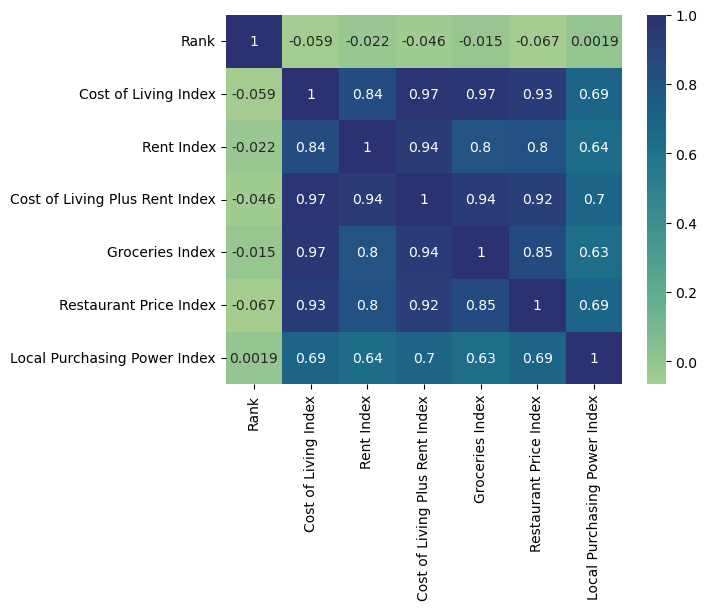

In [37]:
sns.heatmap(corr, annot=True, cmap="crest")